# Reservoir Geomechanics EDX Course (GEOPHYSX0001)- Homework 01

The Stanford Online Reservoir Geomechanics course is available at [EDX](https://courses.edx.org/courses/course-v1:StanfordOnline+GEOPHYSX0001+2T2020/course/). You can find more information about the course [here](https://online.stanford.edu/courses/soeees-ygeoresgeo202-reservoir-geomechanics).<br>

This file contains answers to homework number one. You should follow the questions available in the file `Reservoir_Geomechanics_MOOC_HW1_2020.pdf` to understand the answers provided by the present file.<br>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Folder that holds the data provided by EDX.
DATA = "data"

---

## Table of Contents

* [Read the Data](#read-data)
* [I. Compute the Overburden Stress and the Overburden Gradient](#compute-overburden)
>* [1. Make a plot of density versus depth](#plot_data)
>* [2.“Block” the log into 5 depth units](#plot_chunks)
* [II. Compute Porosity From Density Measurements](#compute-porosity)

---

## Read the Data <a class="anchor" id="read-data"></a>

The following files are provided by EDX, and are stored in the `data` folder:
* `Barnett_density_data.txt`
* `GOM_offshore_density_data.txt`

Opening the files using a text editor, it is possible to see that both have the same structure. We can see that:<br>

1 - The first line holds the headers.<br>
2 - The second line is blank.<br>
3 - The third line is the first line that contains data.

#### Barnett data:

In [3]:
barnett = np.loadtxt(os.path.join(DATA, "Barnett_density_data.txt"), skiprows=2)

In [4]:
# Take a look ate the first 10 lines:
barnett[0:9]

array([[100.5   ,   1.8778],
       [101.    ,   1.8709],
       [101.5   ,   1.8317],
       [102.    ,   1.8363],
       [102.5   ,   1.85  ],
       [103.    ,   1.8441],
       [103.5   ,   1.8299],
       [104.    ,   1.8303],
       [104.5   ,   1.8555]])

In [5]:
# Look for NANs:
np.any(np.isnan(barnett))

True

In [6]:
# Remove NANs:
barnett = barnett[~np.isnan(barnett).any(axis=1)]
# Check:
np.any(np.isnan(barnett))

False

#### GOM data:

In [7]:
gom = np.loadtxt(os.path.join(DATA, "GOM_offshore_density_data.txt"), skiprows=2)

In [8]:
# Take a look ate the first 10 lines:
gom[0:9]

array([[3.515e+03, 2.154e+00],
       [3.516e+03, 2.126e+00],
       [3.517e+03, 2.098e+00],
       [3.518e+03, 2.063e+00],
       [3.519e+03, 2.084e+00],
       [3.520e+03, 2.114e+00],
       [3.521e+03, 2.128e+00],
       [3.522e+03, 2.166e+00],
       [3.523e+03, 2.128e+00]])

In [9]:
# Look for NANs:
np.any(np.isnan(gom))

False

## I. Compute the overburden stress and the overburden gradient <a class="anchor" id="compute-overburden"></a>

Define a function to plot the data.

In [10]:
def plot_data(data: np.ndarray, title: str):
    """Function to plot the data."""
    # Plot the data:
    plt.figure(figsize=(16,16))
    plt.plot(data[:,1], data[:,0], color="blue", linewidth=0.5)
    # Set the Y  limits and reverse it:
    plt.ylim(np.max(data[:,0]), np.min(data[:,0]))
    plt.xlim(1.0, None)
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    # Set X and Y titles and font sizes:
    plt.xlabel("Density (g/cm³)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16);

### 1. Make a plot of density versus depth <a class="anchor" id="plot_data"></a>

#### Barnett data:<BR>

**"_Barnett data – assume a reasonable surface density 1.8778g/cm³ to extrapolate to the first measurement point._"**

In [11]:
# Create a vector that represents the depth from ZERO to the first given point.
z_surface = np.arange(0, 100.5, .5)

In [12]:
# Create a vector that represents density (constant = 1.8778g/cm^3) from ZERO to the first given point
d_surface = np.repeat(1.8778, z_surface.shape[0])

In [13]:
# Join the depth and density surface vectors in one single array:
surface = np.vstack((z_surface, d_surface)).T

In [14]:
# Concatenate the surface data and the data read from the file:
barnett = np.concatenate((surface, barnett), axis=0)
# Take a look:
barnett[5000:5005]

array([[2500.    ,    2.6503],
       [2500.5   ,    2.6496],
       [2501.    ,    2.6788],
       [2501.5   ,    2.656 ],
       [2502.    ,    2.6254]])

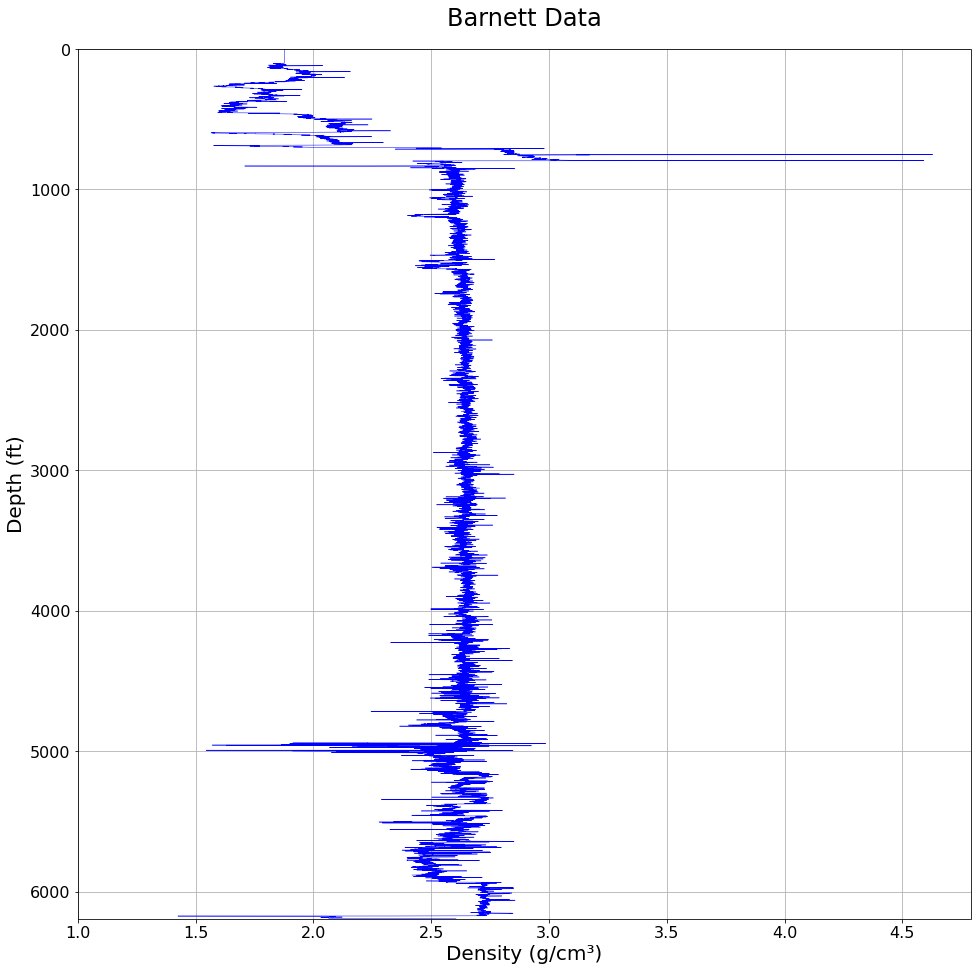

In [15]:
plot_data(barnett, "Barnett Data")

#### GOM:<br>

**"_GOM data – use a density of 1.0 g/cm³ from the surface to the sea floor (depth of 1000ft) and a formation density of 1.7g/cm³ at the sea floor. Linearly interpolate the density between the sea floor and the depth at which the data starts (at the depth of 3515 ft)._"**

In [16]:
# Create a vector that represents the depth from the sea surface to the bottom:
z_sea = np.arange(0, 1001, 1)

In [17]:
# Create a vector that represents the sea water density (constant = 1.0g/cm^3):
d_sea = np.full(z_sea.shape, fill_value=1.0)

In [18]:
# Join the depth and density sea vectors in one single array:
sea = np.vstack((z_sea, d_sea)).T

In [19]:
# Create a vector that represents the depth from the sea bottom to the first given point:
z_surface = np.arange(1000, 3515, 1)

In [20]:
# Create a vector that represents the density from the sea bottom to the first given point interpolating linearly:
d_surface = np.linspace(1.0, 1.7, num=z_surface.shape[0], endpoint=True)

In [21]:
# Join the depth and density surface vectors in one single array:
surface = np.vstack((z_surface, d_surface)).T

In [22]:
# Concatenate the sea data, te surface data and the data read from the file:
gom = np.concatenate((sea, surface, gom), axis=0)
# Take a look:
gom[5000:5005]

array([[4.999e+03, 2.164e+00],
       [5.000e+03, 2.164e+00],
       [5.001e+03, 2.196e+00],
       [5.002e+03, 2.166e+00],
       [5.003e+03, 2.160e+00]])

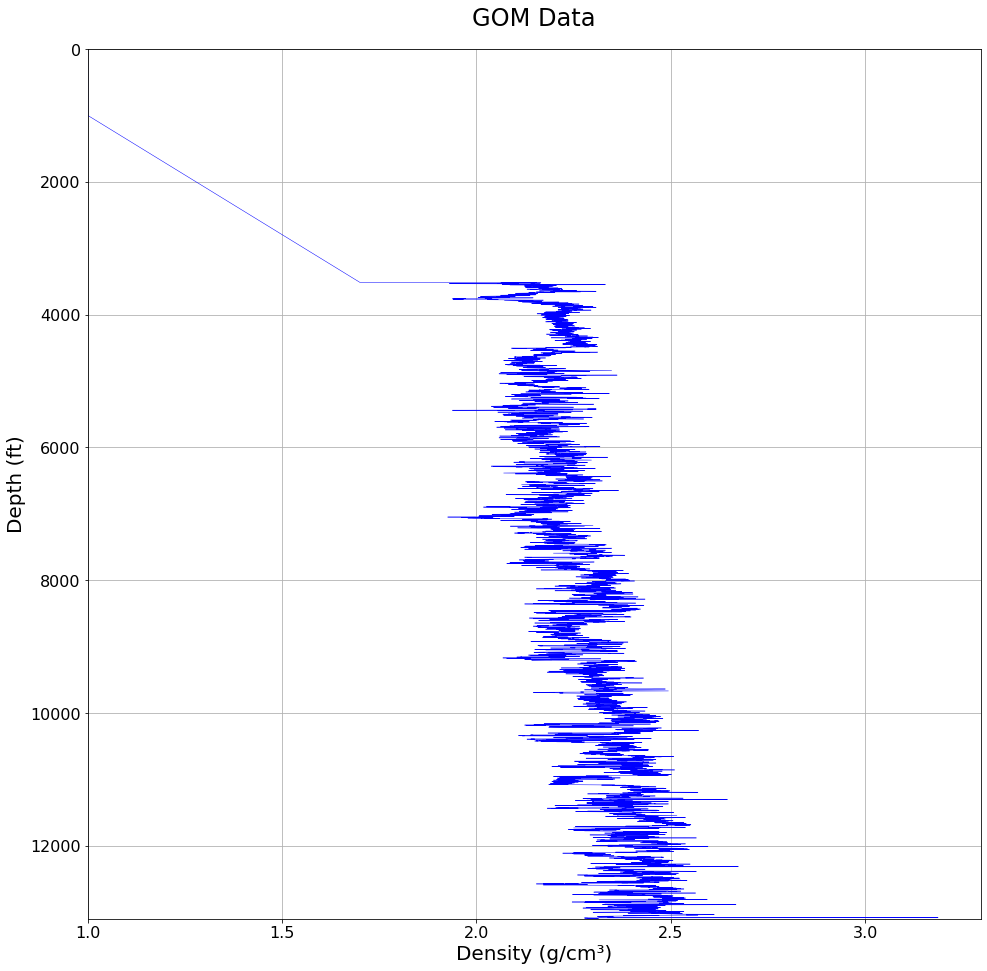

In [23]:
plot_data(gom, "GOM Data")

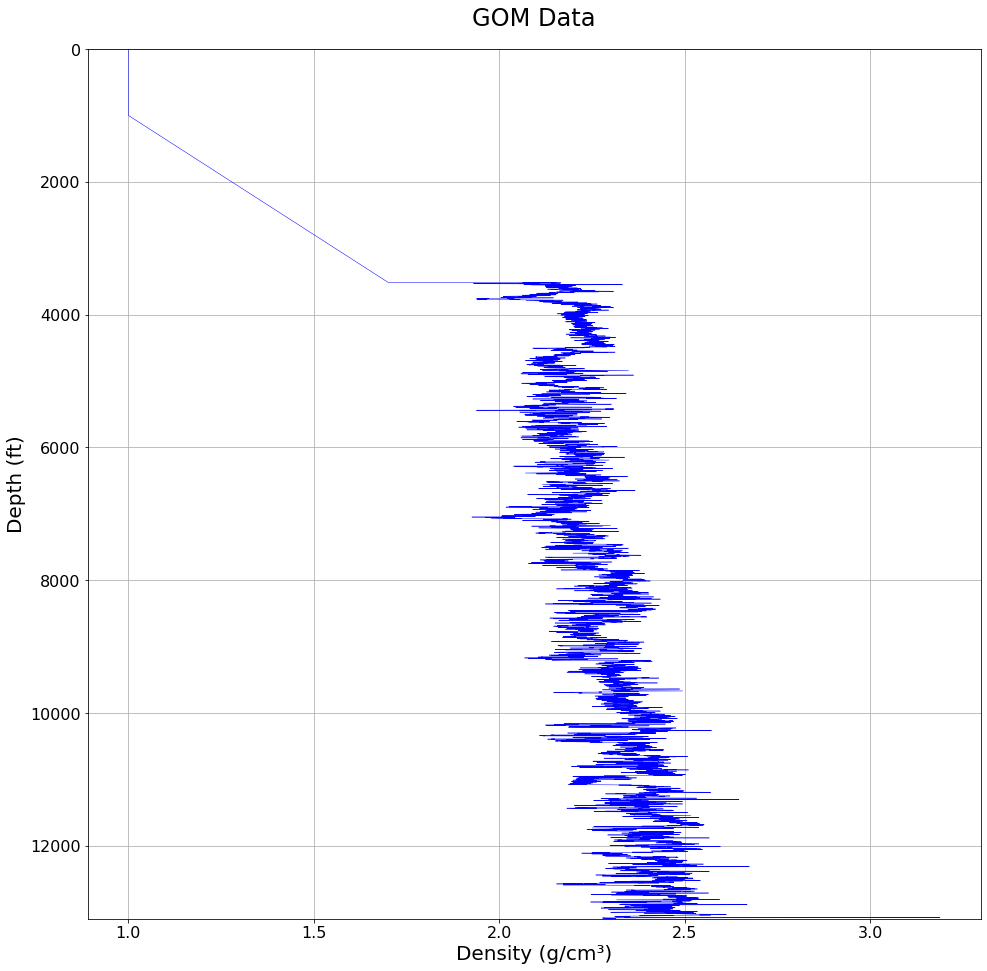

In [24]:
# Plot the data:
plt.figure(figsize=(16,16))
plt.plot(gom[:,1], gom[:,0], color="blue", linewidth=0.5)
# Set the Y  limits and reverse it:
plt.ylim(np.max(gom[:,0]), np.min(gom[:,0]))
# Set the figure title:
plt.title("GOM Data", y= 1.02, fontsize=24)
# Set X and Y titles and font sizes:
plt.xlabel("Density (g/cm³)", fontsize=20)
plt.ylabel("Depth (ft)", fontsize=20)
# Set the grid properties
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

## II. Compute porosity from density measurements <a class="anchor" id="compute-porosity"></a>

## References